![wepik-export-2023110200462732x8](wepik-export-2023110200462732x8.png)

# SMS Spam Collection
This is a text corpus of over 5,500 English SMS messages with ~13% labeled as spam. The text file contains one message per line with two columns: the label ("ham" or "spam") and the raw text of the message. Messages labeled as "ham" are non-spam messages that can be considered legitimate. 

Background: You work for a telecom company that is launching a new messaging app. Unfortunately, previous spam filters that they have used are out of date and no longer effective. They have asked you whether you can use new data they have supplied to distinguish between spam and regular messages accurately. They have also told you that it is essential that regular messages are rarely, if ever, categorized as spam.

[Source](https://www.dt.fee.unicamp.br/~tiago/smsspamcollection/) of dataset. This corpus was created by  [Tiago A. Almeida](https://www.servidores.ufscar.br/talmeida/) and José María Gómez Hidalgo.

**Citations**: 

- Almeida, T.A., Gómez Hidalgo, J.M., Yamakami, A. Contributions to the Study of SMS Spam Filtering: New Collection and Results.  Proceedings of the 2011 ACM Symposium on Document Engineering (DOCENG'11), Mountain View, CA, USA, 2011. 

- Gómez Hidalgo, J.M., Almeida, T.A., Yamakami, A. On the Validity of a New SMS Spam Collection.  Proceedings of the 11th IEEE International Conference on Machine Learning and Applications (ICMLA'12), Boca Raton, FL, USA, 2012. 

- Almeida, T.A., Gómez Hidalgo, J.M., Silva, T.P.  Towards SMS Spam Filtering: Results under a New Dataset.   International Journal of Information Security Science (IJISS), 2(1), 1-18, 2013. 


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split, learning_curve
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

import string
import nltk
from wordcloud import WordCloud

#remove words that don't carry much meaning on their own
nltk.download('stopwords')

#tokenizer
nltk.download('punkt')

#semantic relationships between English words
nltk.download('wordnet')

#grammatical function of a word in a sentence
from nltk.tag import pos_tag

#stopwords
from nltk.corpus import stopwords

import warnings 
warnings.filterwarnings('ignore')

pd.set_option('display.max_row',5572)
pd.set_option('display.max_column',5572)

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\dell\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\dell\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\dell\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [2]:
#Reading dataset
import pandas as pd
df = pd.read_csv("SMSSpamCollection.csv", header=None)
df.columns = ['Label','Message']
df.head()

,Label,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Label    5572 non-null   object
 1   Message  5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


In [5]:
df['Label'].value_counts(normalize=True)

ham     0.865937
spam    0.134063
Name: Label, dtype: float64

In [6]:
#lower case
df['Message'] = df['Message'].str.lower()

In [7]:
#lenght of every message
df['Lenght'] = df.Message.str.len()
df.head()

,Label,Message,Lenght
0,ham,"go until jurong point, crazy.. available only ...",111
1,ham,ok lar... joking wif u oni...,29
2,spam,free entry in 2 a wkly comp to win fa cup fina...,155
3,ham,u dun say so early hor... u c already then say...,49
4,ham,"nah i don't think he goes to usf, he lives aro...",61
5,spam,freemsg hey there darling it's been 3 week's n...,147
6,ham,even my brother is not like to speak with me. ...,77
7,ham,as per your request 'melle melle (oru minnamin...,160
8,spam,winner!! as a valued network customer you have...,157
9,spam,had your mobile 11 months or more? u r entitle...,154


In [9]:
#Replace urls with webaddress
df['Message'] = df['Message'].str.replace(r'^http\://[a-zA-Z0-9\-\.]+\.[a-zA-Z]{2,3}(/\S*)','webaddress')

#Replace email address with email
df['Message'] = df['Message'].str.replace(r'^.+@[^\.].*].[a-z]{2,}$','email')

#Replace digits with phonenumber
df['Message'] =df['Message'].str.replace(r'^\(?[\d]{3}\)?[\s-]?[\d]{3}[\s-]?[\d]{4}$','phonenumber' )

#Replace numeric chards with numbr
df['Message'] =df['Message'].str.replace(r'\d+(\.\d+)?','numbr' )

#Replace curency symbol with moneysymb
df['Message'] =df['Message'].str.replace(r'£|\$','moneysymb' )

#Replace whitespace with single space
df['Message'] =df['Message'].str.replace(r'\s+',' ' )

#Remove punctuations
df['Message'] =df['Message'].str.replace(r'[^\w\d\s]','' )

#Remove leading whitespace
df['Message'] =df['Message'].str.replace(r'^\s+|\s+?$','' )

In [10]:
df.head()

,Label,Message,Lenght
0,ham,go until jurong point crazy available only in ...,111
1,ham,ok lar joking wif u oni,29
2,spam,free entry in numbr a wkly comp to win fa cup ...,155
3,ham,u dun say so early hor u c already then say,49
4,ham,nah i dont think he goes to usf he lives aroun...,61


In [11]:
#Remove stopwords
stop_words = set(stopwords.words('english')+['u','4','2','im','dont','doin','ure','ur','ü'])
df['Message'] = df['Message'].apply(lambda x:" ".join(word for word in x.split() if word not in stop_words))

In [12]:
df['lenght_after_cleaning'] = df['Message'].str.len()
df.head()

,Label,Message,Lenght,lenght_after_cleaning
0,ham,go jurong point crazy available bugis n great ...,111,82
1,ham,ok lar joking wif oni,29,21
2,spam,free entry numbr wkly comp win fa cup final tk...,155,140
3,ham,dun say early hor c already say,49,31
4,ham,nah think goes usf lives around though,61,38


Text(0.5, 1.0, 'Word Lenght distribution after cleaning')

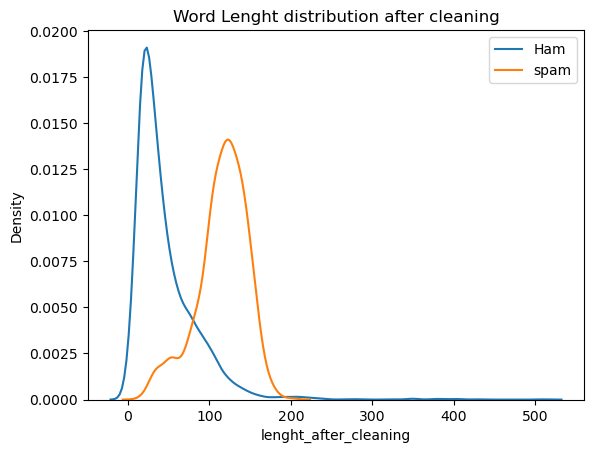

In [13]:
sns.kdeplot(df[df['Label']=='ham']['lenght_after_cleaning'], label = 'Ham')
sns.kdeplot(df[df['Label']=='spam']['lenght_after_cleaning'], label = 'spam')
plt.legend()
plt.title('Word Lenght distribution after cleaning')

(-0.5, 799.5, 499.5, -0.5)

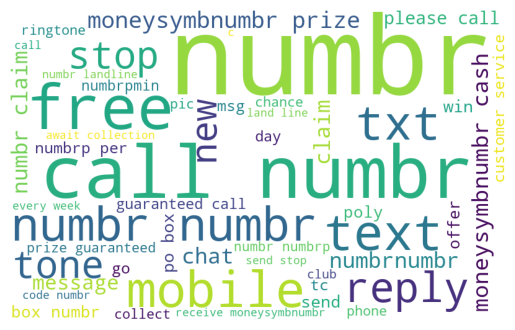

In [14]:
#most frequent words in spam sms
spams = df['Message'][df['Label']=='spam']
cloud = WordCloud(width=800, height=500, background_color='white', max_words=50).generate("".join(spams))
plt.imshow(cloud)
plt.axis('off')

(-0.5, 799.5, 499.5, -0.5)

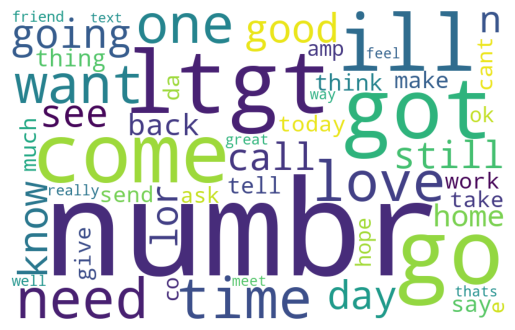

In [15]:
#most frequent words in ham
hams = df['Message'][df['Label']=='ham']
cloud = WordCloud(width=800, height=500, background_color='white', max_words=50).generate("".join(hams))
plt.imshow(cloud)
plt.axis('off')

In [16]:
#label encoder
encoder = LabelEncoder()
df['Label'] = encoder.fit_transform(df['Label'])
#vectorization
tfidf_vector=TfidfVectorizer()
features = tfidf_vector.fit_transform(df['Message'])

#features and target
X=features
y=df['Label']

#train test split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=42)

#model
svm = SVC(kernel='linear', gamma='auto', C=1.0, degree=3)
svm.fit(X_train, y_train)
pred = svm.predict(X_test)
print(accuracy_score(y_test, pred))

0.9856502242152466


In [17]:
#classification report
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       0.99      1.00      0.99       966
           1       0.99      0.91      0.94       149

    accuracy                           0.99      1115
   macro avg       0.99      0.95      0.97      1115
weighted avg       0.99      0.99      0.99      1115



In [18]:
#confusion matrix
print(confusion_matrix(y_test, pred))

[[964   2]
 [ 14 135]]


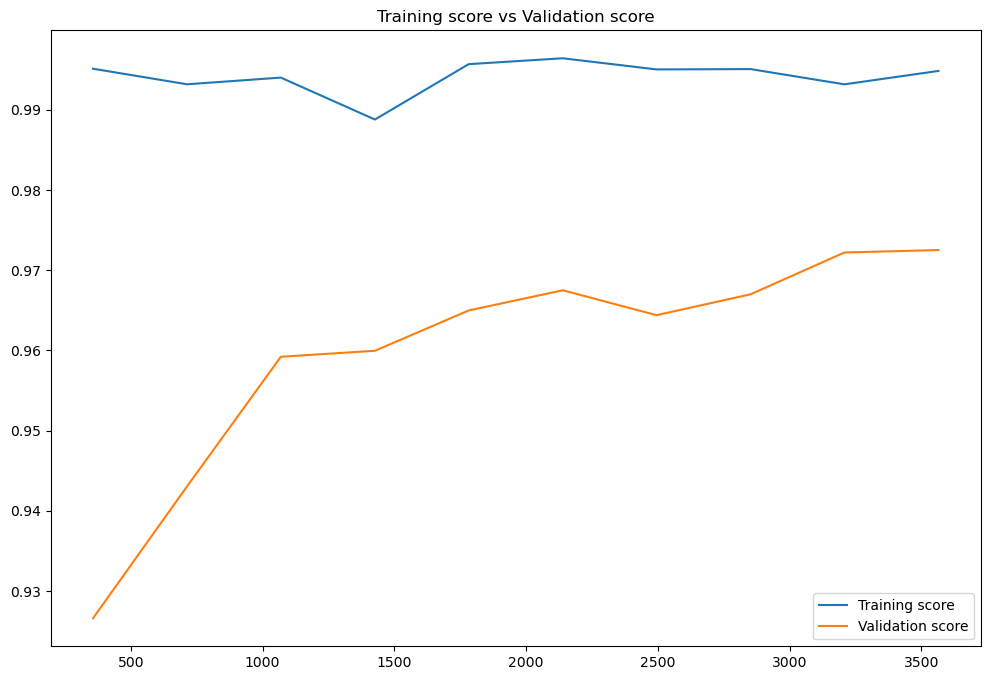

In [19]:
#Learning curve
N, train_score, val_score = learning_curve(svm, X_train, y_train, cv =5, scoring='precision', train_sizes = np.linspace(0.1,1,10))
plt.figure(figsize=(12,8))
plt.plot(N, train_score.mean(axis=1), label ="Training score")
plt.plot(N, val_score.mean(axis=1), label = "Validation score")
plt.title("Training score vs Validation score")
plt.legend()

In [22]:
import pickle
output_model = f'model.bin'
with open(output_model, 'wb') as f_out:
    pickle.dump((tfidf_vector, svm),f_out)